Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

**Часть 1. Приоритизация гипотез.**

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

**Задача**

* Примените фреймворк `ICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Примените фреймворк `RICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Укажите, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`. Объясните, почему так произошло.

**Часть 2. Анализ A/B-теста**

Вы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv и /datasets/visitors.csv`.

Задача

Проанализируйте A/B-тест:
1.	Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2.	Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3.	Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4.	Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
5.	Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
6.	Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7.	Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8.	Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9.	Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10.	Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
11.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12.	Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
13.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14.	Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.


In [1]:
# импорт библиотк
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
from scipy import stats as st
import datetime as dt
# from datetime import date, timedelta

## Анализ и предобработка данных

In [2]:
# присвоение переменным значения данных из файлов
hypo = pd.read_csv("https://code.s3.yandex.net/datasets/hypothesis.csv")
visitors = pd.read_csv("https://code.s3.yandex.net/datasets/visitors.csv")
orders = pd.read_csv("https://code.s3.yandex.net/datasets/orders.csv")


In [3]:
# 1. выводи инфо о данных
# 2. проверка дубликатов и условное удаление дубликатов из данных
# 3. проверка пропусков в данных
# 4. приведение колонок в данных к стилю "snake_style" и проверка

dfs_dict = {'Hypothesis':hypo, 'Visits':visitors, 'Orders':orders}
for name_, df_ in dfs_dict.items():
    print('\033[1m'+f'INFO {name_}'+'\033[0m', end='\n\n')
    print(df_.info(), end='\n\n')
    print('\033[1m'+f'Initial Duplicates in {name_}: '+'\033[0m', df_.duplicated().sum(), end='\n\n')
    if df_.duplicated().sum() > 0:
        df_.drop_duplicates()
        print('\033[1m'+f'Final Duplicates  in {name_}: '+'\033[0m', df_.duplicated().sum(), end='\n\n')
    print('\033[1m'+f'Number of NULLs in {name_}:'+'\033[0m\n', df_.isna().sum(), end='\n\n')
    df_.columns = df_.columns.str.lower().str.replace(' ', '_')
    print('\033[1m'+f'Columns in {name_}:'+'\033[0m\n', df_.columns)
    display(df_.head(1))
    print('='*60)


INFO Hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None

Initial Duplicates in Hypothesis:  0

Number of NULLs in Hypothesis:
 Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

Columns in Hypothesis:
 Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')


,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6


INFO Visits

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

Initial Duplicates in Visits:  0

Number of NULLs in Visits:
 date        0
group       0
visitors    0
dtype: int64

Columns in Visits:
 Index(['date', 'group', 'visitors'], dtype='object')


,date,group,visitors
0,2019-08-01,A,719


INFO Orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

Initial Duplicates in Orders:  0

Number of NULLs in Orders:
 transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Columns in Orders:
 Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B


* данные представлены в трех файлах
* пропуски и дубликаты отсутствуют
* название колонок приведены к ***snake_style***
* данные дат, групп и название гипотез представлены в виде строк
* id, доход, количество посетителей и расчетные категории гипотез представлены в виде целых чисел

In [4]:
# проверка уникальности пользователей в группах
groups = orders.groupby('group', as_index=False).visitorid.nunique()
print('Кол-во клиентов в группе А: \n', groups.query('group == "A"').visitorid)
print()
print('Кол-во клиентов в группе B: \n', groups.query('group == "B"').visitorid)

Кол-во клиентов в группе А: 
 0    503
Name: visitorid, dtype: int64

Кол-во клиентов в группе B: 
 1    586
Name: visitorid, dtype: int64


In [5]:

orders.pivot_table(index='visitorid', values='group', aggfunc='nunique').query('group > 1').count()

group    58
dtype: int64

In [6]:
# проверка численности пользователей в обоих группых одновременно
print('Кол-во пользователей, входящих в обе группы: ', len(orders.groupby('visitorid', as_index=False).group.nunique().query('group > 1')))

Кол-во пользователей, входящих в обе группы:  58


In [7]:
display('ID пользователей, входящих в обе группы: \n',orders.groupby('visitorid', as_index=False).group.nunique().query('group > 1').visitorid.head())

'ID пользователей, входящих в обе группы: \n'

2       8300375
44    199603092
51    232979603
55    237748145
66    276558944
Name: visitorid, dtype: int64

## Расчет ICE и RICE

### ICE

Фреймворк ICE состоит из четырёх компонент:
*    Impact — влияние изменения на поведение и удовлетворенность пользователей;
*    Confidence — степень уверенности во влиянии изменения;
*    Efforts — оценка стоимости теста гипотезы.

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


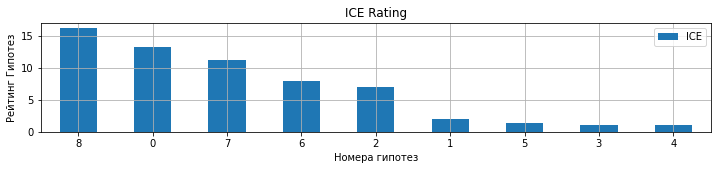

In [8]:
hypo['ICE'] = hypo.impact * hypo.confidence / hypo.efforts
ice_sorted = hypo[['hypothesis', 'ICE']].sort_values('ICE',ascending=False)
display(ice_sorted)
ice_sorted.plot(use_index=True, y='ICE', grid = True, kind = 'bar', title="ICE Rating", figsize=(12,2), rot=0)
plt.xlabel('Номера гипотез')
plt.ylabel('Рейтинг Гипотез')
plt.show()

### RICE

В отличие от `ICE`, `RICE` учитывает количество пользователей, которых будет затрагивать нововведение.

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


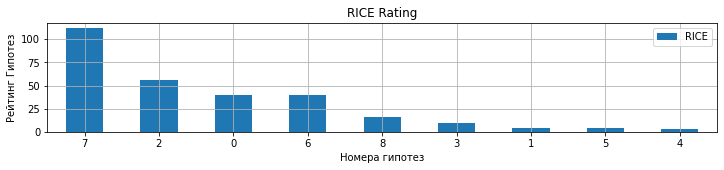

In [9]:
hypo['RICE'] = hypo.reach * hypo.impact * hypo.confidence / hypo.efforts
rice_sorted = hypo[['hypothesis', 'RICE']].sort_values('RICE',ascending=False)
display(rice_sorted)
rice_sorted.plot(use_index=True, y='RICE', grid = True, kind = 'bar', title="RICE Rating", figsize=(12,2), rot=0)
plt.xlabel('Номера гипотез')
plt.ylabel('Рейтинг Гипотез')
plt.show()

Diff. between two first hypos on ICE, normalized:  18.0 %
Diff. between two first hypos on RICE, normalized:  50.0 %


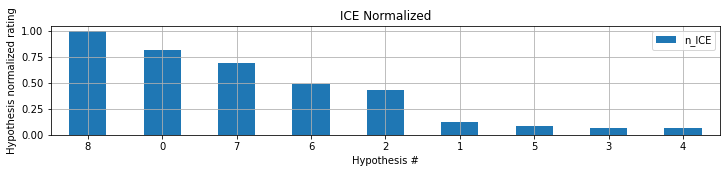

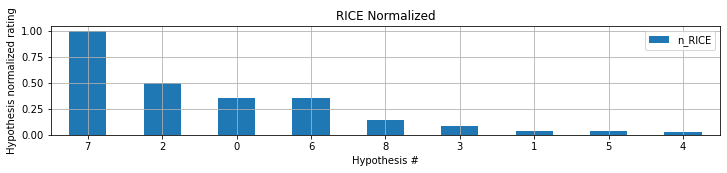

In [10]:
ice_sorted['n_ICE'] = ice_sorted.ICE / ice_sorted.ICE.max()
rice_sorted['n_RICE'] = rice_sorted.RICE / rice_sorted.RICE.max()
ice_sorted.plot(use_index=True, y='n_ICE', grid = True, kind = 'bar', title="ICE Normalized", figsize=(12,2), rot=0)
plt.xlabel('Hypothesis #')
plt.ylabel('Hypothesis normalized rating')
rice_sorted.plot(use_index=True, y='n_RICE', grid = True, kind = 'bar', title="RICE Normalized", figsize=(12,2), rot=0)
plt.xlabel('Hypothesis #')
plt.ylabel('Hypothesis normalized rating')
print('Diff. between two first hypos on ICE, normalized: ', round((ice_sorted.n_ICE[8] - ice_sorted.n_ICE[0]), 2) * 100, '%')
print('Diff. between two first hypos on RICE, normalized: ', round((rice_sorted.n_RICE[7]-rice_sorted.n_RICE[2]),2) * 100, '%')

### **Вывод**
* При учете влияния, степени уверенности и затрат на усилия для проведения проверки гипотез лучший показатель ICE имеет гипотеза №8, причем следующая за ней гипотеза №0 отстоит по нормализованному уровню на 18%
* При включении в формулу объема вовлеченных пользователей лидером становится гипотеза № 7, причем разрыв со вторым местом, которое занимает гипотеза №2, составляет уже 50%


## Анализ A/B-теста

### Кумулятивная выручки по группам

In [11]:
# массив уникальных пар значений дат и групп теста
datesGroups = visitors[['date','group']]

In [12]:
# агрегация данных заказа по дням:
# даты заказа, группы, количество уникальных транзакций (заказов), пользователей, сумма выручки

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [13]:
# агрегация данных пользователей по дням:
# даты заказа, группы, количество пользователей

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [14]:
# общие кумулятивные данные

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      24      20   148579       719
1  2019-08-01     B      21      20   101217       713
2  2019-08-02     A      44      38   242401      1338
3  2019-08-02     B      45      43   266748      1294
4  2019-08-03     A      68      62   354874      1845


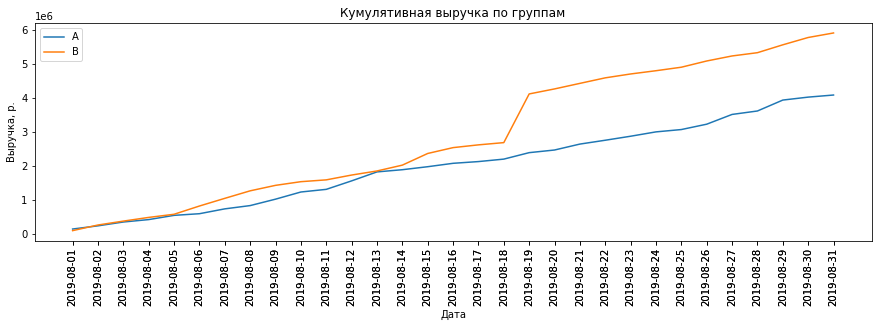

In [15]:
plt.rcParams["figure.figsize"] = (15, 4)    # размер графика

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xticks(rotation=90) 
plt.legend()
plt.xticks(cumulativeData.date)
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка, р.')
plt.show()

#### **Вывод**
Кумулятивная выручка для группы В до 2019-08-19 слегка опережает этот же параметр для группы А, после чего начинается резкое стабильное значительное превышение. Это может говорить о повышении среднего чека, об увеличении кол-ва покупателей и/или об увеличении кол-ва покупок на одного покупателя.

### Кумулятивный средний чек по группам

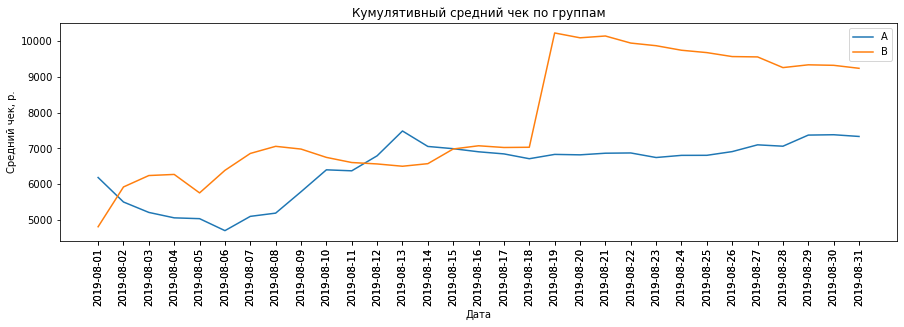

In [16]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xticks(rotation=90) 
plt.legend()
plt.xticks(cumulativeData.date)
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек, р.')
plt.show()

#### **Вывод**
Кумулятивн средний чек для группы В также превышате этот же показатель для группы А после 2019-08-19

### График относительного изменения кумулятивного среднего чека группы B к группе A

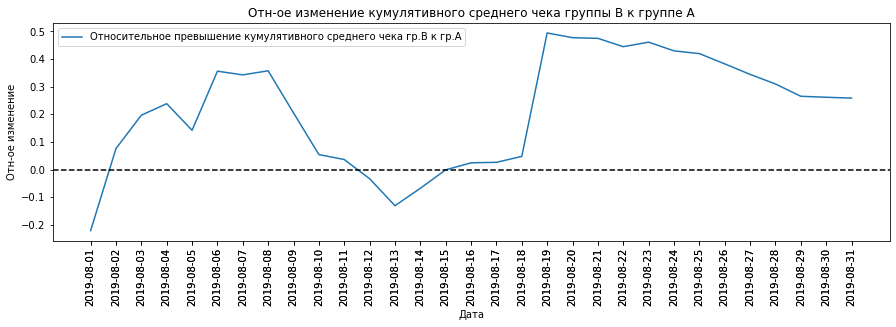

In [18]:
# объединение данных
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, label='Относительное превышение кумулятивного среднего чека гр.B к гр.A')
plt.legend()
plt.axhline(y=0, color='black', linestyle='--') # ось X
plt.xticks(rotation=90) 
# plt.legend()
plt.xticks(cumulativeData.date)
plt.title('Отн-ое изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отн-ое изменение')
plt.show()

In [19]:
print('Максимум относительного превышения кумулятивного среднего чека В над А :\n', \
      round(((mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/\
             (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1).max()*100, 2), "%")

Максимум относительного превышения кумулятивного среднего чека В над А :
 49.47 %


#### **Вывод**
Относительное сравнение кумулятивного среднего чека группы В с группой А так же показывает в основном превышение данного показателя за отчетный период и составляет в максимуме 49,47%, что приходится на дату 2019-08-19

### Кумулятивная конверсия по группам

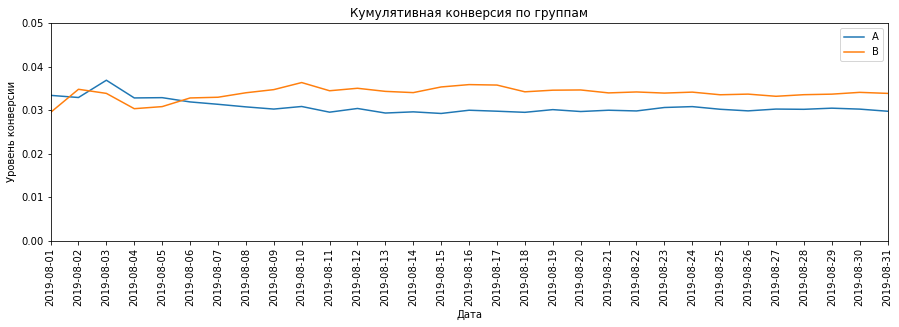

In [20]:
# кумулятивная конверсия
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']              # данные по группе A
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']              # данные по группе B

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A') # графики
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=90) 
plt.axis(["2019-08-01", '2019-08-31', 0, 0.05])                             # масштаб осей
plt.title('Кумулятивная конверсия по группам')
plt.xlabel('Дата')
plt.ylabel('Уровень конверсии')
plt.show()

#### **Вывод**
Кумулятивная конверсия по группам нестабильна в течение первых шести дней, что говорит о дребезге на низких объемах анализа, после чего показатель для группы В стабильно превышает показатель группы А

### График относительного изменения кумулятивной конверсии группы B к группе A

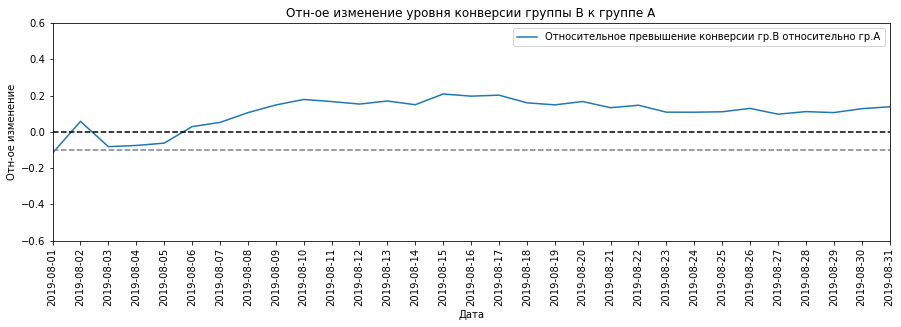

In [21]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительное превышение конверсии гр.B относительно гр.A")
plt.legend()
plt.xticks(rotation=90) 
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.6, 0.6])
plt.title('Отн-ое изменение уровня конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отн-ое изменение')
plt.show()

In [22]:
print('Максимум относительного превышения конверии В над А :', \
      round(((mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1).max())*100, 2), "%")

Максимум относительного превышения конверии В над А : 20.86 %


#### **Вывод**
Относительная кумулятивная конверсия группы В после получения достаточного объема данных стабильно превышает показатель гр.А по прошествии шести дней с начала наблюдения и достигает положительного экстремума в 20,86%

### Точечный график количества заказов по пользователям, перцентили 90 и 95

In [23]:
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values('orders', ascending=False).head(10))

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


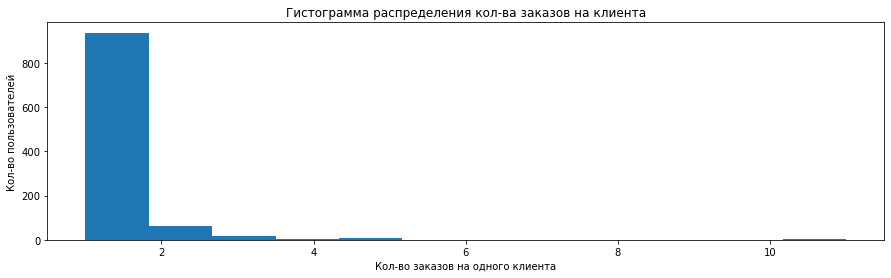

In [24]:
plt.hist(ordersByUsers['orders'], bins=12)
plt.title('Гистограмма распределения кол-ва заказов на клиента')
plt.xlabel('Кол-во заказов на одного клиента')
plt.ylabel('Кол-во пользователей')
plt.show()

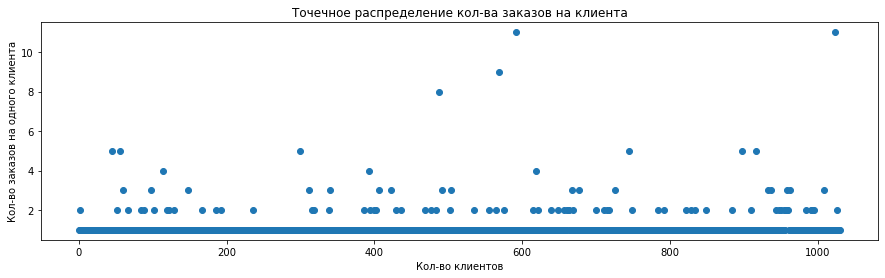

In [25]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечное распределение кол-ва заказов на клиента')
plt.xlabel('Кол-во клиентов')
plt.ylabel('Кол-во заказов на одного клиента')
plt.show()

In [26]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


#### **Вывод**
* Подавляющая часть пользователей делает заказы в одном количестве. Нередки пользователи, которые делают 2 заказа. Также встречаются пользователи, делающие более двух заказов
* 95% клиентов делают до 2-х заказов включительно
* 99% - до 4-х включительно

### Точечный график стоимостей заказов, перцентили 90 и 95

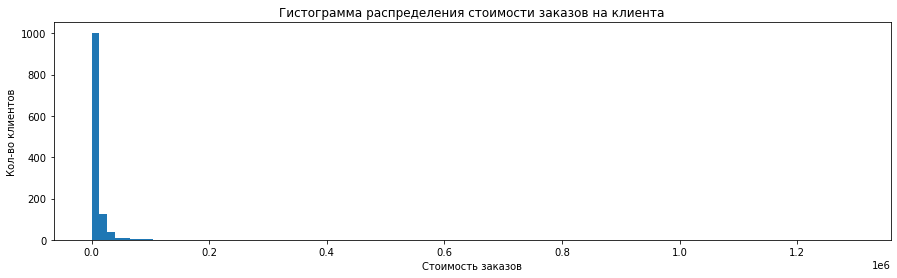

In [27]:
plt.hist(orders['revenue'],bins=100)
plt.title('Гистограмма распределения стоимости заказов на клиента')
plt.xlabel('Стоимость заказов')
plt.ylabel('Кол-во клиентов')
plt.show()

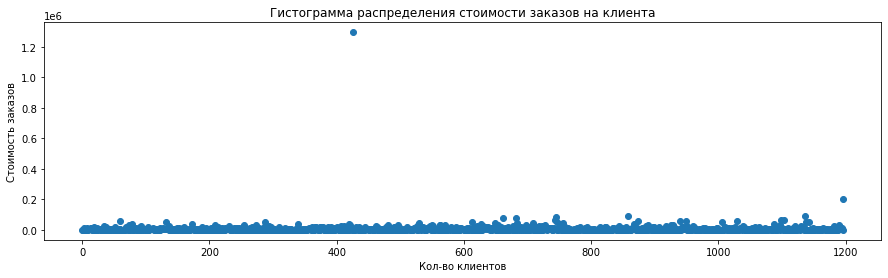

In [28]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Гистограмма распределения стоимости заказов на клиента')
plt.xlabel('Кол-во клиентов')
plt.ylabel('Стоимость заказов')
plt.show()

In [29]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


#### **Вывод**
* 95% клиентов делают до заказ на сумму до 28,000р
* 99% - приблизительно до 58.233р
* принято, что обычный пользователель совершает не более двух заказов за короткий срок, поэтому выбираем границу необычности / нормальности в 95%


### Статистическая значимость различий в конверсии  и среднего чека между группами в случае неотфильтрованных выбросов («сырые» данные)

#### Отличие конверсий

* В качестве нулевой гипотезы $Н_{0}$ примем, что статистически значимого различия между конверсиями групп нет;
* Гипотеза $Н_{1}$ будет говорить о противоположном: имеется статистически значимое различие между уровнями конверсий двух групп на выбранном пороговом уровне значимости alpha;
* За уровень значимости возьмем стандарт alpha=0.05
* Для расчета стат.значимости различий уровня конверсий будет использоваться непараметрический тест Уилкоксона-Манна-Уитни


In [30]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [31]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
print(data.head(5))

         date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0  2019-08-01              24           148579              21   
1  2019-08-02              20            93822              24   
2  2019-08-03              24           112473              16   
3  2019-08-04              16            70825              17   
4  2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61           

In [32]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [33]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
alpha = 0.05
result = st.mannwhitneyu(sampleA, sampleB)[1]
print('p.value = ', "{0:.3f}".format(result))
if result > alpha: print("Стат.значемого отличия в конверсии между группами нет")
else: print("Конверсии групп статистически значимо отличаются") 

print("Относительное отличие конверсии гр.В от гр.А = ", "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


p.value =  0.017
Конверсии групп статистически значимо отличаются
Относительное отличие конверсии гр.В от гр.А =  0.138


#### Отличие средних чеков

In [34]:
# по аналогии с конверсией, Н0 - различий нет, Н1 - есть, alpha =0.05
result = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('p.value = ', "{0:.3f}".format(result))
if result > alpha: print("Стат.значемого отличия между средними чеками между группами нет")
else: print("Средние чеков групп статистически значимо отличаются") 
print("Относительное отличие средних чеков гр.В от гр.А = ", '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p.value =  0.729
Стат.значемого отличия между средними чеками между группами нет
Относительное отличие средних чеков гр.В от гр.А =  0.259


#### **Вывод** неочищенные данные
* Конверсии групп статистически отличимы
* Стат.значемого отличия в средними чеками между группами нет

### Статистическая значимость различий в конверсии  и среднего чека между группами в случае очищенных данных

In [35]:
# Кол-во необычных по поводенеию пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorid'],            # более 2-х заказов
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorid']     # сумма заказа более 
exceptional = (                                                               # 28000р для 5%
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)        # клиентов
    .drop_duplicates()
    .sort_values()
)
# print(exceptional.head(5))
print(f'Кол-во пользователей с необычным пользовательским поведением: {len(exceptional)}')

Кол-во пользователей с необычным пользовательским поведением: 74


In [36]:
# фильтрация групп от необычных пользователей

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(exceptional))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(exceptional))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Аналогчным образом расчитываем стат.значимость гипотез для очищенных данных

In [37]:
result = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print('p.value = ', "{0:.3f}".format(result))
if result > alpha: print("Стат.значемого отличия в конверсии между группами нет")
else: print("Конверсии групп статистически значимо отличаются") 

print("Относительное отличие конверсии отфильтрованных гр.В от гр.А = ", "{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

p.value =  0.013
Конверсии групп статистически значимо отличаются
Относительное отличие конверсии отфильтрованных гр.В от гр.А =  0.173


In [39]:
result = st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A'
        ,np.logical_not(orders['visitorid'].isin(exceptional)),)]['revenue']
        ,orders[np.logical_and(orders['group'] == 'B'
        , np.logical_not(orders['visitorid'].isin(exceptional)),)]['revenue'],)[1]

print('p.value = ', '{0:.3f}'.format(result))
if result > alpha: print("Стат.значемого отличия между средними чеками между группами нет")
else: print("Средние чеков групп статистически значимо отличаются") 
print("Относительное отличие средних чеков гр.В от гр.А = ", "{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B'
        , np.logical_not(orders['visitorid'].isin(exceptional)),)]['revenue'].mean()\
        / orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorid']
        .isin(exceptional)),)]['revenue'].mean() - 1))

p.value =  0.738
Стат.значемого отличия между средними чеками между группами нет
Относительное отличие средних чеков гр.В от гр.А =  -0.020


#### **Вывод**
* Конверсии групп статистически значимо отличаются (для неочищенных данных p.value = 1.7%, для очищенных данных p.value = 1.3%)
* Стат.значемого отличия между средними чеками между группами нет  (для неочищенных данных p.value = 72.9%, для очищенных данные - 73.8%)
* Различие между группами обусловлено разницей между конверсиями: конверсия в гр.В выше, чем в гр.А

### **Общий вывод**

**Данные**
* При учете влияния, степени уверенности и затрат на усилия для проведения проверки гипотез лучший показатель ICE имеет гипотеза №8, причем следующая за ней гипотеза №0 отстоит по нормализованному уровню на 18%
* При включении в формулу объема вовлеченных пользователей лидером становится гипотеза № 7, причем разрыв со вторым местом, которое занимает гипотеза №2, составляет уже 50%

**Кумулятивная выручки по группам**

Кумулятивная выручка для группы В до 2019-08-19 слегка опережает этот же параметр для группы А, после чего начинается резкое стабильное значительное превышение. Это может говорить о повышении среднего чека, об увеличении кол-ва покупателей и/или об увеличении кол-ва покупок на одного покупателя.

**Кумулятивный средний чек по группам**

Кумулятивн средний чек для группы В также превышате этот же показатель для группы А после 2019-08-19
Относительное сравнение кумулятивного среднего чека группы В с группой А так же показывает в основном превышение данного показателя за отчетный период и составляет в максимуме 49,47%, что приходится на дату 2019-08-19

**Кумулятивная конверсия по группам**

Кумулятивная конверсия по группам нестабильна в течение первых шести дней, что говорит о дребезге на низких объемах анализа, после чего показатель для группы В стабильно превышает показатель группы А

Относительная кумулятивная конверсия гр.В после получения достаточного объема данных стабильно превышает показатель гр.А по прошествии шести дней с начала наблюдения и достигает положительного экстремума в 20,86%

**Количества заказов по пользователям**

* Подавляющая часть пользователей делает заказы в одном количестве. Нередки пользователи, которые делают 2 заказа. Также встречаются пользователи, делающие более двух заказов
* 95% клиентов делают до 2-х заказов включительно
* 99% - до 4-х включительно
стоимостей заказов
* 95% клиентов делают до заказ на сумму до 28,000р
* 99% - приблизительно до 58.233р
* Принято, что обычный пользователель совершает не более двух заказов за короткий срок, поэтому выбрана границу необычности / нормальности в 95%


**Статистическая значимость различий в конверсии и среднего чека между группами в случае неотфильтрованных выбросов («сырые» данные)**

* Конверсии групп статистически отличимы
* Стат.значемого отличия в средними чеками между группами нет

**Статистическая значимость различий в конверсии и среднего чека между группами в случае очищенных данных**
* Конверсии групп статистически значимо отличаются (для неочищенных данных p.value = 1.7%, для очищенных данные - 1.3%)
* Стат.значемого отличия между средними чеками между группами нет (для неочищенных данных p.value = 72.9%, для очищенных данных - 73.8%)
* Различие между группами обусловлено разницей между конверсиями: конверсия в гр.В выше, чем в гр.А



**Итог**: в связи с положительной устойчивостью показателя конверсии гр.В в сравнении с гр.А в течение тестового периода продолжительностью в месяц рекомендуется остановить тест, зафиксировать результат победы гр.В в части метрик «конверсия».